EEE PROJECT

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [122]:
df_sheet1=pd.read_excel('400kV_Chandrapur_Badhravati Line_4.xlsx',sheet_name='Sheet1',header=None,nrows=3000)

In [123]:
df_sheet1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,NP2412A,2000,3636. 364,M,400kV Bhadravati line-1 at Chandrapur,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Hour,FC1,WH for TB1,FC2,WH for TB2,FC3,WH for TB3,FC4,WH for TB1,f1,f2,f3,f4,favg,MWh1,MWh2,MWh3,MWh4,MWhavg
2,7525.5,0,50,0.89,47,0.63,54,0.51,54,0.22,50,49.97,50.04,50.04,50.0125,6.472728,4.581819,3.709091,1.6,4.090909
3,22011.6,1,48,0.28,49,0.21,49,0.11,47,-0.08,49.98,49.99,49.99,49.97,49.9825,2.036364,1.527273,0.8,-0.581818,0.945455
4,233.3,2,50,-0.17,48,-0.26,52,-0.2,49,-0.33,50,49.98,50.02,49.99,49.9975,-1.236364,-1.890909,-1.454546,-2.4,-1.745455


In [124]:
df_sheet1[0][1]='NP2412A'
ct_ratio=df_sheet1[1][0]
pt_ratio=df_sheet1[2][0]
cond_type=df_sheet1[3][0]
print(f'CT ratio : {ct_ratio}')
print(f'PT ratio : {pt_ratio}')
print(f'CONDUCTOR TYPE : {cond_type}')

CT ratio : 2000
PT ratio : 3636. 364
CONDUCTOR TYPE : M


In [125]:
df_sheet1.drop(df_sheet1.index[0],inplace=True)
df_sheet1,df_sheet1.columns=df_sheet1[1:],df_sheet1.iloc[0]
df_sheet1.head()

1,NP2412A,Hour,FC1,WH for TB1,FC2,WH for TB2,FC3,WH for TB3,FC4,WH for TB1,f1,f2,f3,f4,favg,MWh1,MWh2,MWh3,MWh4,MWhavg
2,7525.5,0,50,0.89,47,0.63,54,0.51,54,0.22,50,49.97,50.04,50.04,50.0125,6.472728,4.581819,3.709091,1.6,4.090909
3,22011.6,1,48,0.28,49,0.21,49,0.11,47,-0.08,49.98,49.99,49.99,49.97,49.9825,2.036364,1.527273,0.8,-0.581818,0.945455
4,233.3,2,50,-0.17,48,-0.26,52,-0.2,49,-0.33,50,49.98,50.02,49.99,49.9975,-1.236364,-1.890909,-1.454546,-2.4,-1.745455
5,2020-04-06 00:00:00,3,48,-1,48,-0.95,51,-0.85,53,-0.76,49.98,49.98,50.01,50.03,50,-7.272728,-6.909092,-6.181819,-5.527273,-6.472728
6,NaN,4,52,-0.59,49,-0.64,55,-0.57,50,-0.64,50.02,49.99,50.05,50,50.015,-4.29091,-4.654546,-4.145455,-4.654546,-4.436364


In [126]:
df_sheet1['NP2412A'].isna()

2       False
3       False
4       False
5       False
6        True
        ...  
2995     True
2996     True
2997     True
2998     True
2999     True
Name: NP2412A, Length: 2998, dtype: bool

### MWhavg plot with respect to time

C:\Users\HP\Downloads\anaconda\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1080x1080 with 0 Axes>

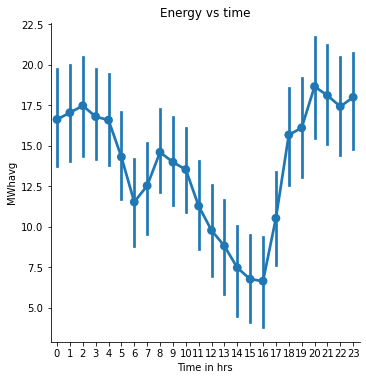

In [127]:
plt.figure(figsize=(15,15))
sns.factorplot(x='Hour',y='MWhavg',data=df_sheet1)
plt.xlabel('Time in hrs')
plt.ylabel('MWhavg')
plt.title('Energy vs time')
plt.show()

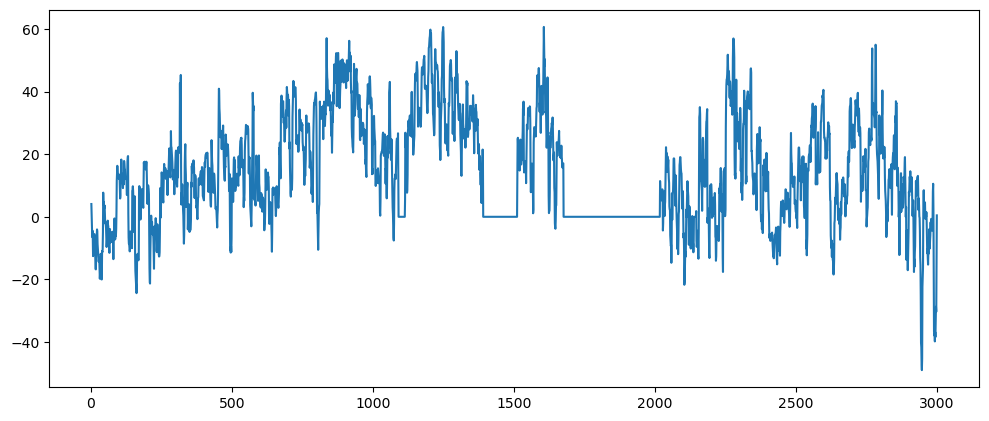

In [128]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(df_sheet1["MWhavg"], label='Hour')

COLORING

In [253]:
df_sheet9=pd.read_excel('400kV_Chandrapur_Badhravati Line_4.xlsx',sheet_name='Sheet9',header=None,nrows=3000)
df_sheet9,df_sheet9.columns=df_sheet9[1:],df_sheet9.iloc[0]

In [254]:
df_sheet9.head(10)

,NP2412A,NP2119A,Losses1,NP2424A,NP2198A,Losses2,NP2261A,NP2286A,Losses3,NP2322A,...,Losses5,NP8708A,NP6741A,Losses6,NP6263A,NP6264A,Losses7,NP6758A,NP6268A,Losses8
1,MWhavg,MWhavg,NaN,MWhavg,MWhavg,NaN,MWhavg,MWhavg,NaN,MWhavg,...,NaN,MWhavg,MWhavg,NaN,MWhavg,MWhavg,NaN,MWhavg,MWhavg,NaN
2,4.090909,-3.690909,0.4,3.563637,-3.127273,0.436364,3.4,-3.163637,0.236364,3.254546,...,0.854546,-41.890913,41.045459,-0.845455,52.74546,-52.381823,0.363636,52.709096,-52.118187,0.590909
3,0.945455,-0.618182,0.327273,0.509091,-0.181818,0.327273,0.945455,-0.745455,0.2,0.8,...,0.654546,-44.05455,44.645459,0.590909,53.936369,-53.563642,0.372727,53.790914,-53.427278,0.363636
4,-1.745455,2.327273,0.581818,-2.072727,2.727273,0.654546,-1.309091,1.654546,0.345455,-1.436364,...,0.718182,-43.381823,43.463641,0.081818,55.454551,-55.072733,0.381818,55.181824,-55.127278,0.054545
5,-6.472728,6.145455,-0.327273,-6.69091,6.29091,-0.4,-4.709091,4.618182,-0.090909,-4.818182,...,0.7,-41.890913,42.118186,0.227273,55.481824,-55.018187,0.463636,55.218187,-55.100006,0.118182
6,-4.436364,4.49091,0.054545,-4.672728,4.727273,0.054545,-3.127273,3.163637,0.036364,-3.236364,...,0.7,-43.309095,43.427277,0.118182,53.936369,-53.509096,0.427273,53.663642,-53.672733,-0.009091
7,-6.745455,7.236364,0.490909,-6.945455,7.509092,0.563636,-4.963637,5.218182,0.254545,-5.109091,...,0.827273,-46.800005,46.772732,-0.027273,57.627278,-57.272733,0.354545,57.663642,-56.709097,0.954546
8,-12.581819,12.69091,0.109091,-12.69091,12.872729,0.181818,-9.309092,9.581819,0.272727,-9.563637,...,0.545455,-40.65455,41.490913,0.836364,62.945461,-62.463643,0.481818,62.827279,-62.345461,0.481818
9,-10.872728,10.563637,-0.309091,-11.000001,10.636365,-0.363636,-7.781819,7.800001,0.018182,-8.000001,...,0.690909,-42.527277,42.800004,0.272727,63.081824,-62.590915,0.490909,62.83637,-62.654552,0.181818
10,-8.345455,8.000001,-0.345455,-8.545455,8.109092,-0.436364,-5.818182,5.763637,-0.054545,-6.018182,...,0.5,-39.909095,40.590913,0.681818,59.527279,-58.881824,0.645455,58.881824,-59.627279,-0.745455


In [255]:
def coloring(value):
    value=float(value)

    if value >-0.35 and value <0.35:
        color = 'green'
    elif value >-0.5 and value <-0.35 :
        color = 'yellow'
    elif value>0.35 and value <0.5:
        color = 'yellow'
    elif value>-3and value<-0.5:
        color='orange'
    elif value>0.5 and value <3:
        color='orange'
    else:
        color='red'
    return 'color: %s' % color

In [271]:

x=df_sheet9.iloc[1:,0:24].style.applymap(coloring,subset=['Losses1','Losses2','Losses3','Losses4','Losses5','Losses6','Losses7','Losses8'])


In [273]:
type(x)

pandas.io.formats.style.Styler

In [274]:
x.to_excel('cloured_data_of_sheet9.xlsx')